In [1]:
%matplotlib inline
%pylab inline

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

Modelo anterior: 0.8041457147175896


In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            1  
4      0            373450   8.0500   NaN        S            0

## Análise do Erro

In [5]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    
    X_treino , X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)    
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    
    resultados.append(acc)
    print("ACC:", acc)   
    print()

Treino: 445
Valid: 446
ACC: 0.7869955156950673

Treino: 446
Valid: 445
ACC: 0.7797752808988764

Treino: 445
Valid: 446
ACC: 0.827354260089686

Treino: 446
Valid: 445
ACC: 0.8179775280898877

Treino: 445
Valid: 446
ACC: 0.7847533632286996

Treino: 446
Valid: 445
ACC: 0.7842696629213484

Treino: 445
Valid: 446
ACC: 0.8161434977578476

Treino: 446
Valid: 445
ACC: 0.7842696629213484

Treino: 445
Valid: 446
ACC: 0.8004484304932735

Treino: 446
Valid: 445
ACC: 0.8

Treino: 445
Valid: 446
ACC: 0.8183856502242153

Treino: 446
Valid: 445
ACC: 0.802247191011236

Treino: 445
Valid: 446
ACC: 0.8116591928251121

Treino: 446
Valid: 445
ACC: 0.8067415730337079

Treino: 445
Valid: 446
ACC: 0.820627802690583

Treino: 446
Valid: 445
ACC: 0.7887640449438202

Treino: 445
Valid: 446
ACC: 0.8385650224215246

Treino: 446
Valid: 445
ACC: 0.8044943820224719

Treino: 445
Valid: 446
ACC: 0.7982062780269058

Treino: 446
Valid: 445
ACC: 0.8112359550561797



## Recuperando a última amostra de validação para checagem

In [6]:
X_valid_check = train.iloc[linhas_valid]
X_valid_check['p'] = p
X_valid_check.head()

<ipython-input-6-b004bbb79ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_check['p'] = p


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  p  
0      0         A/5 21171   7.2500   NaN        S            0  0  
1      0          PC 17599  71.2833   C85        C            1  1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  0  
3      0            113803  53.1000  C123        S            1  1  
4      0            373450   8.0500   NaN        S            0  0

In [7]:
'''
Separando apenas os casos em que o que foi previsto é diferente.
'''
filtro = X_valid_check['Survived'] != X_valid_check['p']

erros = X_valid_check[filtro]

variaveis = ['PassengerId',  'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p','Survived']
erros = erros[variaveis]
erros.head()

PassengerId  Pclass                                               Name  \
2             3       3                             Heikkinen, Miss. Laina   
21           22       2                              Beesley, Mr. Lawrence   
22           23       3                        McGowan, Miss. Anna "Annie"   
23           24       1                       Sloper, Mr. William Thompson   
25           26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   

       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
2   female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
21    male  34.0      0      0            248698  13.0000   D56        S   
22  female  15.0      0      0            330923   8.0292   NaN        Q   
23    male  28.0      0      0            113788  35.5000    A6        S   
25  female  38.0      1      5            347077  31.3875   NaN        S   

    Sex_binario  p  Survived  
2             1  0         1  
21            0  0         1  
22            1  0         1  
23            0  0         1  
25            1  0         1

In [8]:
filtroF = erros['Sex'] == 'female'
mulheres = erros[filtroF]

filtroM = erros['Sex'] == 'male'
homens = erros[filtroM]

In [9]:
mulheres.sort_values('Survived').head()

PassengerId  Pclass                                             Name  \
888          889       3         Johnston, Miss. Catherine Helen "Carrie"   
501          502       3                              Canavan, Miss. Mary   
498          499       1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
882          883       3                     Dahlberg, Miss. Gerda Ulrika   
474          475       3                      Strandberg, Miss. Ida Sofia   

        Sex   Age  SibSp  Parch      Ticket      Fare    Cabin Embarked  \
888  female   NaN      1      2  W./C. 6607   23.4500      NaN        S   
501  female  21.0      0      0      364846    7.7500      NaN        Q   
498  female  25.0      1      2      113781  151.5500  C22 C26        S   
882  female  22.0      0      0        7552   10.5167      NaN        S   
474  female  22.0      0      0        7553    9.8375      NaN        S   

     Sex_binario  p  Survived  
888            1  1         0  
501            1  1         0  
498            1  1         0  
882            1  1         0  
474            1  1         0

## Novas Variáveis

In [10]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [11]:
train['Nome_contem_Mr']

0      1
1      1
2      0
3      1
4      1
      ..
886    0
887    0
888    0
889    1
890    1
Name: Nome_contem_Mr, Length: 891, dtype: int64

In [12]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp',  'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 
             'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 
             'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados2 = []

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    
    X_treino , X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)   
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    
    resultados2.append(acc)
    print("ACC:", acc)   
    print()

Treino: 445
Valid: 446
ACC: 0.8295964125560538

Treino: 446
Valid: 445
ACC: 0.8089887640449438

Treino: 445
Valid: 446
ACC: 0.8139013452914798

Treino: 446
Valid: 445
ACC: 0.802247191011236

Treino: 445
Valid: 446
ACC: 0.8161434977578476

Treino: 446
Valid: 445
ACC: 0.8157303370786517

Treino: 445
Valid: 446
ACC: 0.8116591928251121

Treino: 446
Valid: 445
ACC: 0.8202247191011236

Treino: 445
Valid: 446
ACC: 0.8183856502242153

Treino: 446
Valid: 445
ACC: 0.8089887640449438

Treino: 445
Valid: 446
ACC: 0.8251121076233184

Treino: 446
Valid: 445
ACC: 0.8089887640449438

Treino: 445
Valid: 446
ACC: 0.8385650224215246

Treino: 446
Valid: 445
ACC: 0.8044943820224719

Treino: 445
Valid: 446
ACC: 0.8116591928251121

Treino: 446
Valid: 445
ACC: 0.8044943820224719

Treino: 445
Valid: 446
ACC: 0.8363228699551569

Treino: 446
Valid: 445
ACC: 0.8202247191011236

Treino: 445
Valid: 446
ACC: 0.8318385650224215

Treino: 446
Valid: 445
ACC: 0.8202247191011236



((array([3., 3., 2., 3., 4., 0., 1., 1., 1., 2.]),
  array([0.80224719, 0.80587897, 0.80951076, 0.81314254, 0.81677432,
         0.82040611, 0.82403789, 0.82766967, 0.83130146, 0.83493324,
         0.83856502]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

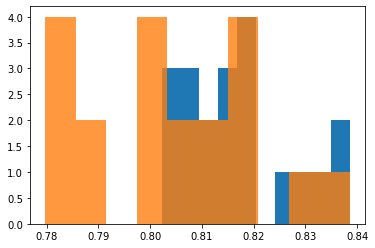

In [15]:
pylab.hist(resultados2), pylab.hist(resultados, alpha=0.8)

In [16]:
np.mean(resultados2)

0.8173895299037639

## Recriando as novas variáveis criadas no treino para teste

In [17]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo = LogisticRegression(max_iter=1000)

modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [18]:
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Criar submission

In [19]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64

In [20]:
sub.to_csv('modelo_4.csv', header=True)